In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import *

In [28]:
df = pd.read_csv("./Downloads/yulu_data.csv")
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [29]:
df.season.value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [3]:
df.shape

(10886, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


Changing datatype of below attributes : -

1. datetime - to datetime
2. season - to categorical
3. holiday - to categorical
4. workingday - to categorical
5. weather - to categorical

In [5]:
df['datetime'] = pd.to_datetime(df['datetime'])
cat_cols= ['season', 'holiday', 'workingday', 'weather']
for col in cat_cols:
  df[col] = df[col].astype('object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 1020.7+ KB


In [7]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [8]:
df.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

In [9]:
def isunique(i):
  print(df[i].unique())

In [10]:
cols = ["season","holiday","workingday","weather"]

for ele in cols:
  print(ele)
  print(isunique(ele))
  print("**************************")

season
[1 2 3 4]
None
**************************
holiday
[0 1]
None
**************************
workingday
[0 1]
None
**************************
weather
[1 2 3 4]
None
**************************


In [11]:
def distribution(i):
  print(df[i].value_counts(normalize = True)*100)


columns = ["season","holiday","workingday","weather"]

for ele in columns:
  print(ele)
  print()
  print(distribution(ele))
  print("***************************")

season

4    25.114826
2    25.105640
3    25.105640
1    24.673893
Name: season, dtype: float64
None
***************************
holiday

0    97.14312
1     2.85688
Name: holiday, dtype: float64
None
***************************
workingday

1    68.087452
0    31.912548
Name: workingday, dtype: float64
None
***************************
weather

1    66.066507
2    26.033437
3     7.890869
4     0.009186
Name: weather, dtype: float64
None
***************************


In [12]:
df.describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


1. There are no missing values in the dataset.
2. Casual and registered attributes might have outliers because their mean and median are very far away to one another and the value of standard deviation is also high which tells us that there is high variance in the data of these attributes.

# Minimum datetime and maximum datetime

In [13]:
print("Minimum Datetime: ", df['datetime'].min())
print("Maximum Datetime: ",df['datetime'].max())
df[cat_cols].melt().groupby(['variable', 'value'])[['value']].count()

Minimum Datetime:  2011-01-01 00:00:00
Maximum Datetime:  2012-12-19 23:00:00


value
variable   value       
holiday    0      10575
           1        311
season     1       2686
           2       2733
           3       2733
           4       2734
weather    1       7192
           2       2834
           3        859
           4          1
workingday 0       3474
           1       7412

# Univariate Analysis:
Try establishing a relation between the dependent and independent variable (Dependent “Count” & Independent: Workingday, Weather, Season etc)

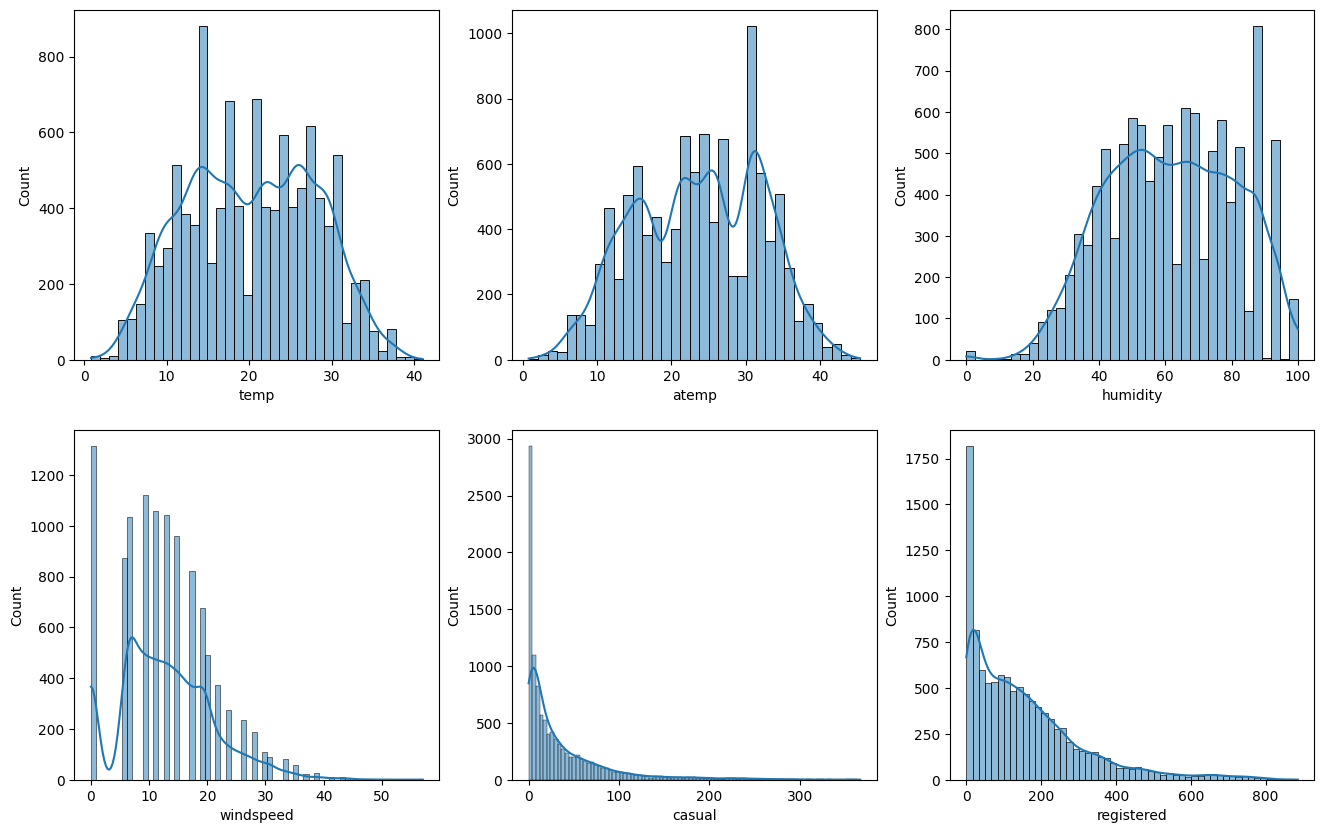

<function matplotlib.pyplot.show(close=None, block=None)>

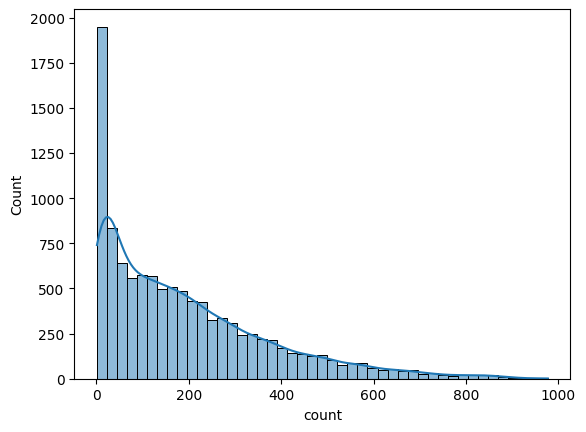

In [14]:
num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual',
'registered','count']

fig, axis = plt.subplots(nrows = 2, ncols = 3, figsize=(16,10))
index = 0
for r in range(2):
    for c in range(3):
        sns.histplot(df[num_cols[index]], ax=axis[r,c], kde=True)
        index += 1
        
plt.show()
sns.histplot(df[num_cols[-1]], kde=True)
plt.show

1. Casual, registered and count somewhat looks like Log Normal Distribution.
2. Temp, atemp and humidity looks like they follows the Normal Distribution.
3. Windspeed follows the binomial distribution.

# Plotting box plots to detect outliers in the data

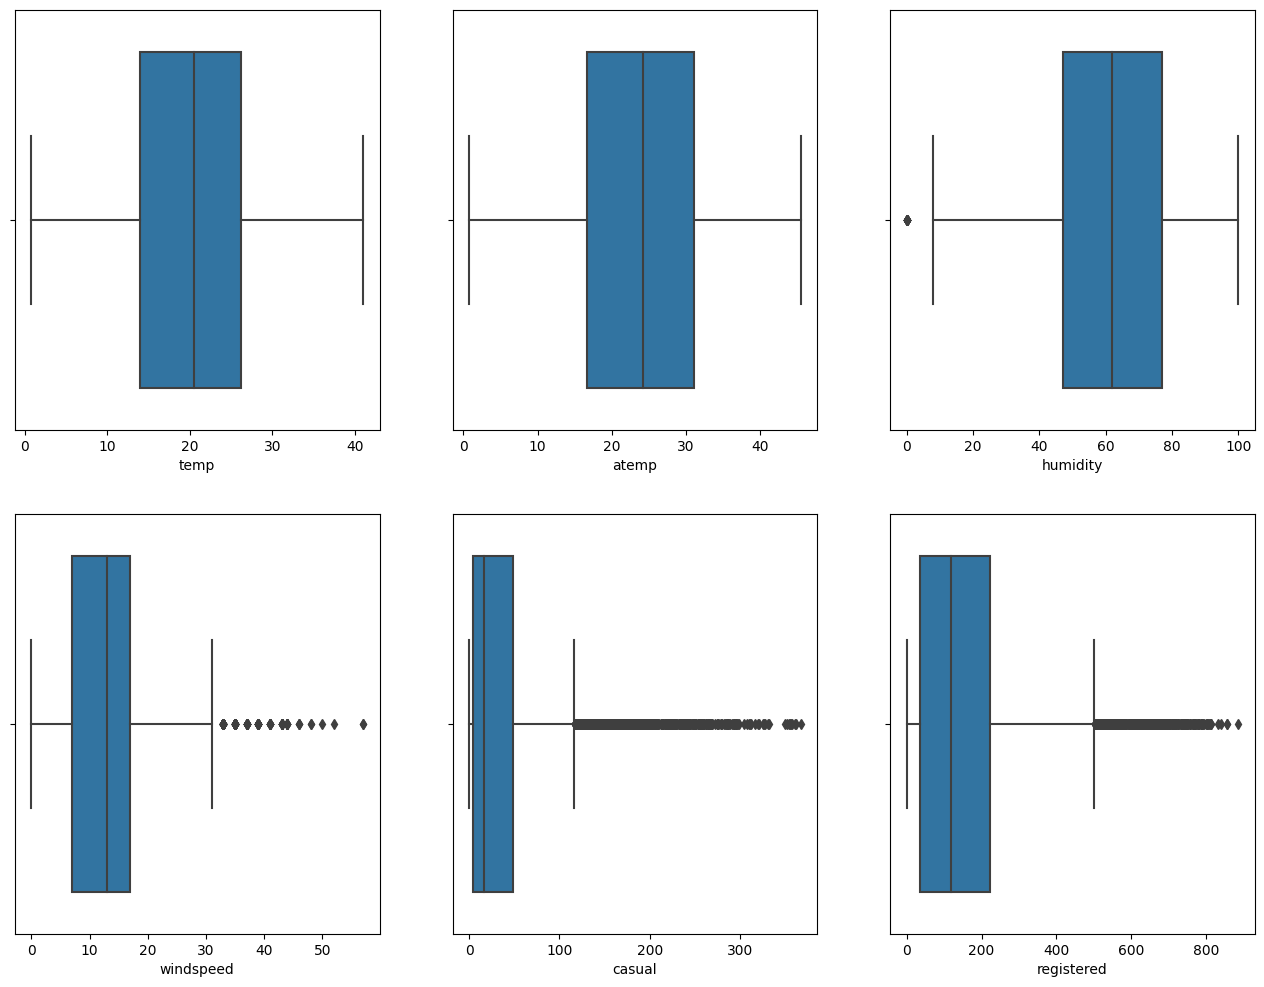

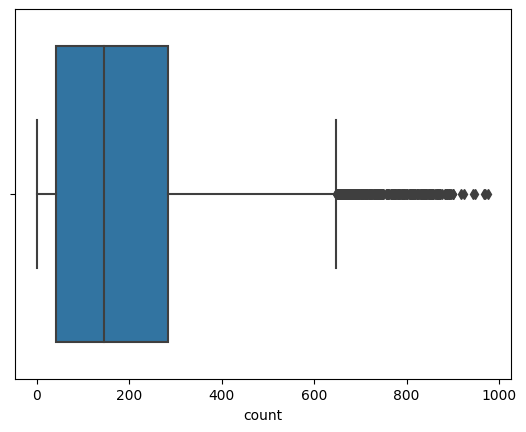

In [15]:
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))
index = 0
for row in range(2):
    for col in range(3):
        sns.boxplot(x=df[num_cols[index]], ax=axis[row, col])
        index += 1
plt.show()
sns.boxplot(x=df[num_cols[-1]])
plt.show()

1. Number of casual users and registered users keep changing based on different factors like weather, season. Hence a lot of outliers are seen in these two attributes.
2. Windspeed changes as per change in weather. Rainy season has more windspeed as compared to summer. This might be the reason for outliers in windspeed data.

## Countplot of each categorical column

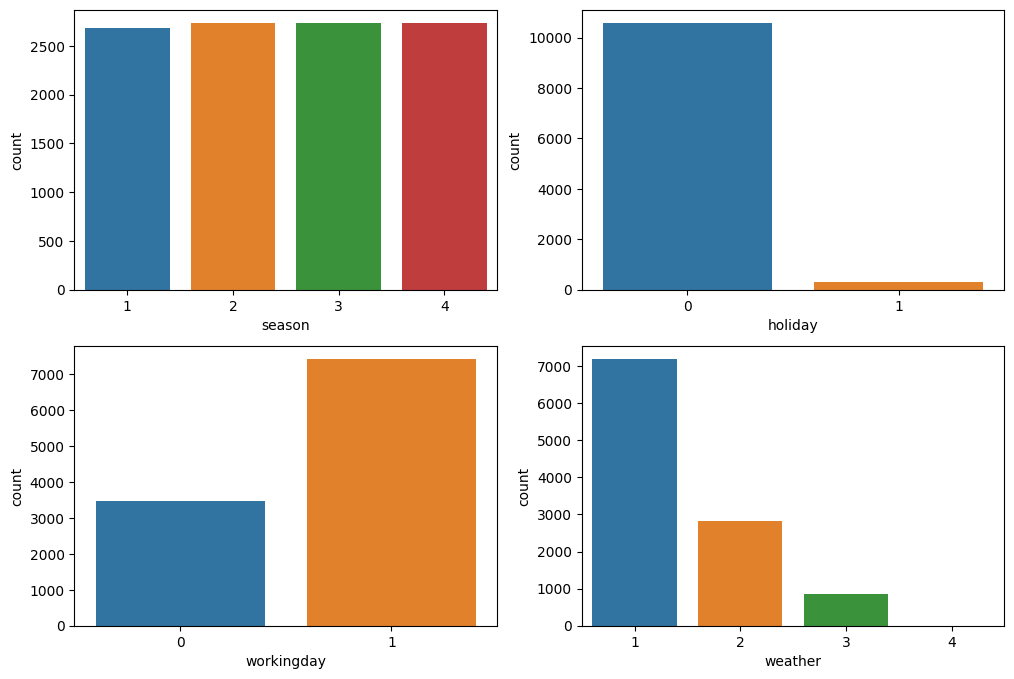

In [19]:
df.head()

df[df["workingday"] == 1]["count"].sum()

df[(df["workingday"] == 1) & (df["registered"])]["count"].sum()


df[df["workingday"] == 0]["count"].sum()

df[df["holiday"] == 1]["count"].sum()


df[df["holiday"] == 0]["count"].sum()


fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
index = 0
for row in range(2):
    for col in range(2):
        sns.countplot(data=df, x=cat_cols[index], ax=axis[row, col])
        index += 1
plt.show()

Data looks common as it should be like equal number of days in each season, more working days and weather is mostly Clear, Few clouds, partly cloudy, partly cloudy.

# Bi-variate Analysis

## Plotting categorical variables againt count using boxplots

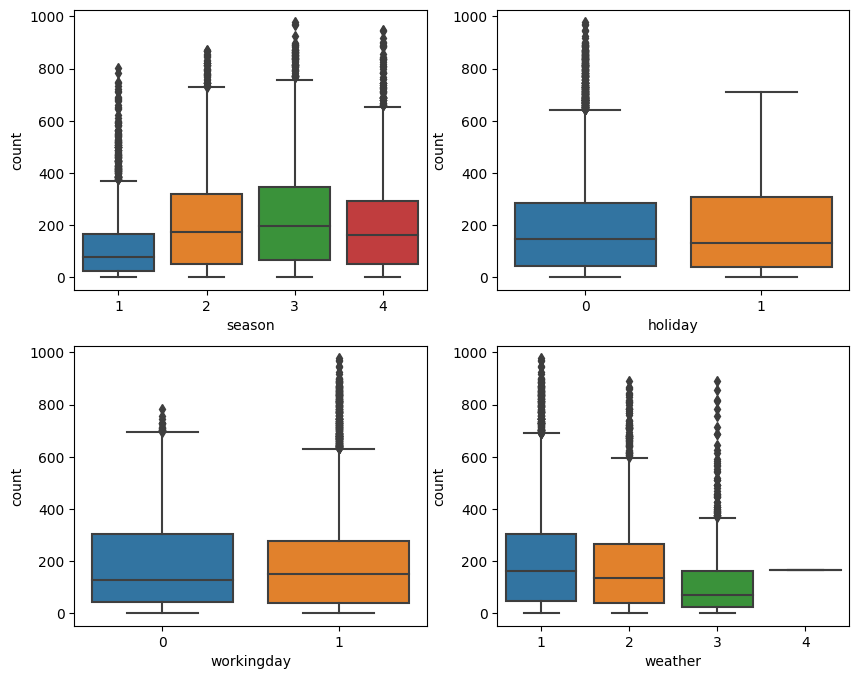

In [20]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
index = 0
for row in range(2):
    for col in range(2):
        sns.boxplot(data=df, x=cat_cols[index], y='count', ax=axis[row,col])
        index += 1
plt.show()

1. In summer and fall seasons more bikes are rented as compared to other seasons.
2. Whenever its a holiday more bikes are rented.
3. It is also clear from the workingday  that whenever day is holiday or weekend, slightly more bikes were rented.
4. Whenever there is rain, thunderstorm, snow or fog, there were less bikes were rented.

## Plotting numerical variables againt count using scatterplot.

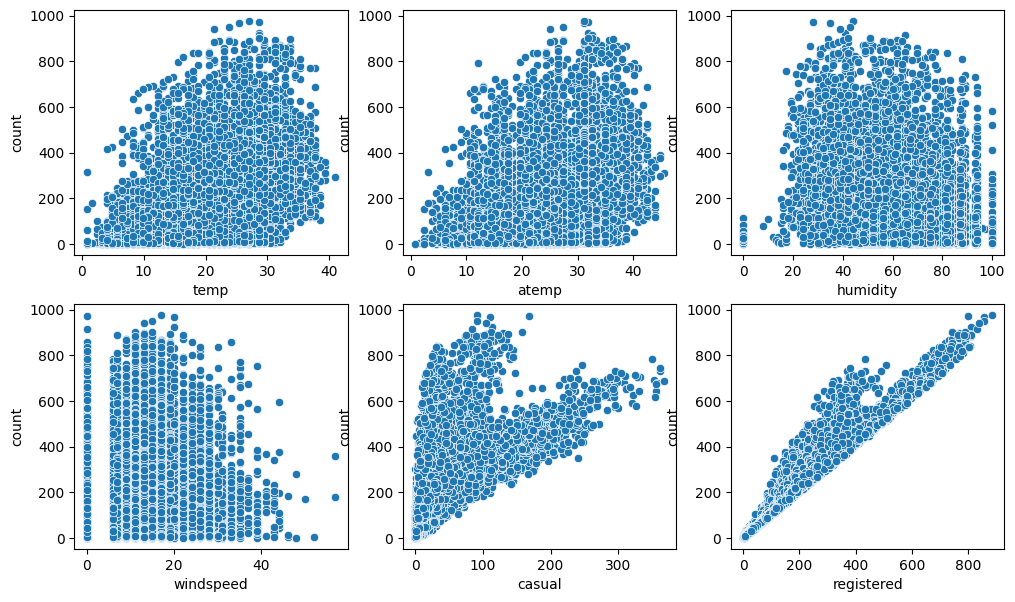

In [21]:
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(12, 7))
index = 0
for row in range(2):
    for col in range(3):
        sns.scatterplot(data=df, x=num_cols[index], y='count',ax=axis[row, col])
        index += 1
plt.show()

1. Whenever the humidity is less than 20, number of bikes rented is very very low.
2. Whenever the temperature is less than 10, number of bikes rented is less.
3. Whenever the windspeed is greater than 35, number of bikes rented is less.

## Understanding the correlation between count and numerical variables. 

C:\Users\ABBAS\AppData\Local\Temp\ipykernel_21912\214049277.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, linewidth=0.5)


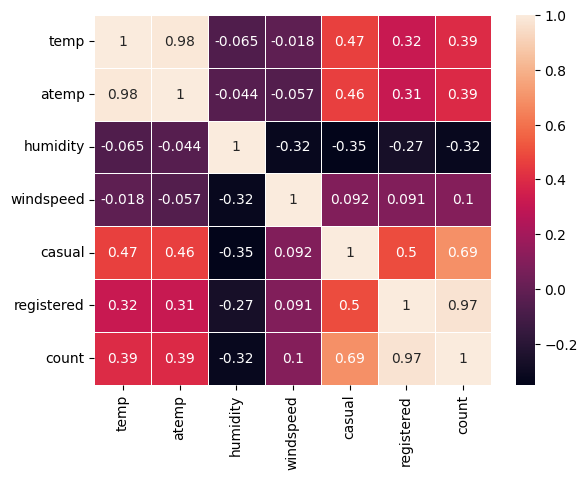

In [27]:
sns.heatmap(df.corr(), annot=True, linewidth=0.5)
plt.show()

## Hypothesis Testing

# Chi-square test to check if Weather is dependent on the season

Null Hypothesis (H0): Weather is independent of the season

Alternate Hypothesis (H1): Weather is dependent on the season

Significance level (alpha): 0.05

In [40]:
data_table = pd.crosstab(df['season'], df['weather'])
print("Observed values:")
data_table

val = chi2_contingency(data_table)
print(val)
print()
print("***********************************************")


Expected_values = val[3]
print(f'Expected_values : {val[3]}')
print()
print("***********************************************")


nrows, ncols = 4, 4
dof = (nrows-1)*(ncols-1)
print(f"Degrees of freedom: {dof}")
print()
print("***********************************************")
alpha = 0.05

chi_sqr = sum([(o-e)**2/e for o, e in zip(data_table.values,Expected_values)])
chi_sqr_statistic = chi_sqr[0] + chi_sqr[1]
print(f"Chi-square test statistic: {chi_sqr_statistic}")
print()
print("***********************************************")


critical_val = chi2.ppf(q=1-alpha, df=dof)
print(f"Critical value: {critical_val}")
print()
print("***********************************************")


p_val = 1-chi2.cdf(x=chi_sqr_statistic, df=dof)
print(f"P-value: {p_val}")
print()
print("***********************************************")


if p_val < alpha:
  print("Result: Since p-value is less than the alpha 0.05 we reject Null Hypothesis. This indicates weather is dependent on the season.")
else:
  print("Result: Since p-value is greater than the alpha 0.05 we do not reject the Null Hypothesis")

Observed values:
Chi2ContingencyResult(statistic=49.158655596893624, pvalue=1.549925073686492e-07, dof=9, expected_freq=array([[1.77454639e+03, 6.99258130e+02, 2.11948742e+02, 2.46738931e-01],
       [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
       [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
       [1.80625831e+03, 7.11754180e+02, 2.15736359e+02, 2.51148264e-01]]))

***********************************************
Expected_values : [[1.77454639e+03 6.99258130e+02 2.11948742e+02 2.46738931e-01]
 [1.80559765e+03 7.11493845e+02 2.15657450e+02 2.51056403e-01]
 [1.80559765e+03 7.11493845e+02 2.15657450e+02 2.51056403e-01]
 [1.80625831e+03 7.11754180e+02 2.15736359e+02 2.51148264e-01]]

***********************************************
Degrees of freedom: 9

***********************************************
Chi-square test statistic: 44.09441248632364

***********************************************
Critical value: 16.918977604620448

****************

# 2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented :

Null Hypothesis: Working day has no effect on the number of cycles being rented.

Alternate Hypothesis: Working day has effect on the number of cycles being rented.

Significance level (alpha): 0.05

In [41]:
data_group1 = df[df['workingday']==0]['count'].values
data_group2 = df[df['workingday']==1]['count'].values
print(np.var(data_group1), np.var(data_group2))
np.var(data_group2)// np.var(data_group1)

30171.346098942427 34040.69710674686


1.0

Before conducting the two-sample T-Test we need to find if the given data groups have the same variance. If the ratio of the larger data groups to the small data group is less than 4:1 then we can consider that the given data groups have equal variance.

In [48]:
t_stats, p_value =  ttest_ind(a=data_group1, b=data_group2, equal_var=True)
alpha = 0.05
print(f"t_stats: {t_stats}")
print(f"p_value: {p_value}\n")

if p_value < alpha:
    print("Result: Since pvalue is less than 0.05 so we  reject the Null hypothesis. We have the sufficient evidence to say that working day has effect on the number of cycles being rented.")
else:
    print("Result: Since pvalue is greater than 0.05 so we cannot reject the Null hypothesis. We don't have the sufficient evidence to say that working day has effect on the number of cycles being rented.")

t_stats: -1.2096277376026694
p_value: 0.22644804226361348

Result: Since pvalue is greater than 0.05 so we cannot reject the Null hypothesis. We don't have the sufficient evidence to say that working day has effect on the number of cycles being rented.


# ANNOVA to check if No. of cycles rented is similar or different in different weather and season.¶

Null Hypothesis: Number of cycles rented is similar in different weather and season.

Alternate Hypothesis: Number of cycles rented is not similar in different weather and season.

Significance level (alpha): 0.05


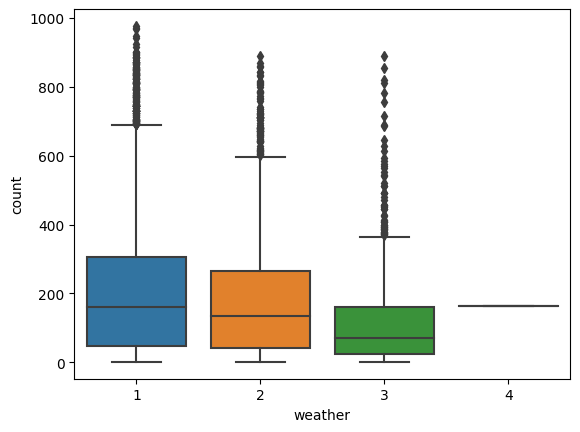

a: 205.24
b: 178.96
c: 118.85
d: 164.0


In [56]:
df["weather"].unique()

df["weather"].value_counts()

sns.boxplot(x='weather', y='count', data=df)
plt.show()

count_g1 = df[df["weather"]==1]["count"]
count_g2 = df[df["weather"]==2]["count"]
count_g3 = df[df["weather"]==3]["count"]
count_g4 = df[df["weather"]==4]["count"]

a,b,c,d = [round(count_g1.mean(), 2),round(count_g2.mean(),2),round(count_g3.mean(),2),round(count_g4.mean(),2)]

print(f"a: {a}")
print(f"b: {b}")
print(f"c: {c}")
print(f"d: {d}")

In [57]:
# Numeric Vs categorical for many categories

# H0: All weather's have same number of cycles rented.
# Ha: Atleast one or more weather conditions have different number of cycles rented.

f_stats, p_value = f_oneway(count_g1,count_g2,count_g3,count_g4)
print(f"p_value : {p_value}")
print()

if p_value < 0.05:
    print("Reject H0")
    print("Different weathers have different number of cycles rented")
else:
    print("Fail to reject H0 or accept H0")
    print("All weather's have same number of cycles rented.")

p_value : 5.482069475935669e-42

Reject H0
Different weathers have different number of cycles rented


Since P-value is very less we reject the null hypothesis. Atleast one or more weather conditions have different number of cycles rented.

### Season check

In [58]:
df["season"].unique()

array([1, 2, 3, 4], dtype=int64)

In [60]:
df["season"].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

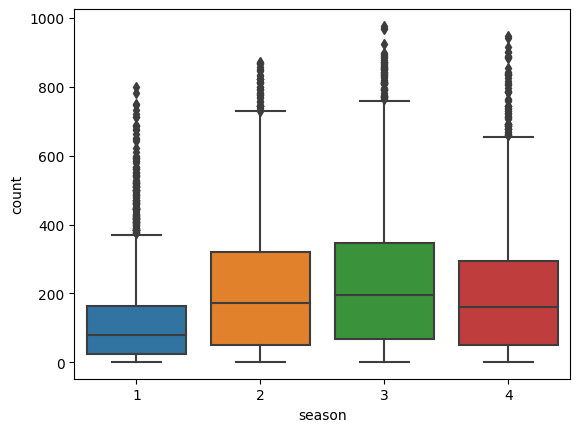

In [61]:
sns.boxplot(x='season', y='count', data=df)
plt.show()

In [62]:
coun_g1 = df[df["season"]==1]["count"]
coun_g2 = df[df["season"]==2]["count"]
coun_g3 = df[df["season"]==3]["count"]
coun_g4 = df[df["season"]==4]["count"]

a,b,c,d = [round(coun_g1.mean(), 2),round(coun_g2.mean(),2),round(coun_g3.mean(),2),round(coun_g4.mean(),2)]

print(f"a: {a}")
print(f"b: {b}")
print(f"c: {c}")
print(f"d: {d}")

a: 116.34
b: 215.25
c: 234.42
d: 198.99


In [63]:
# Numeric Vs categorical for many categories

# H0: All seasons's have same number of cycles rented.
# Ha: Atleast one or more seasons  have different number of cycles rented.

f_stats, p_value = f_oneway(coun_g1,coun_g2,coun_g3,coun_g4)
print(f"p_value : {p_value}")
print()

if p_value < 0.05:
    print("Reject H0")
    print("Different seasons have different number of cycles rented")
else:
    print("Fail to reject H0 or accept H0")
    print("All seasons have same number of cycles rented.")

p_value : 6.164843386499654e-149

Reject H0
Different seasons have different number of cycles rented


## Checking Assumptions of Anova test

#### QQ plot and histogram for weather

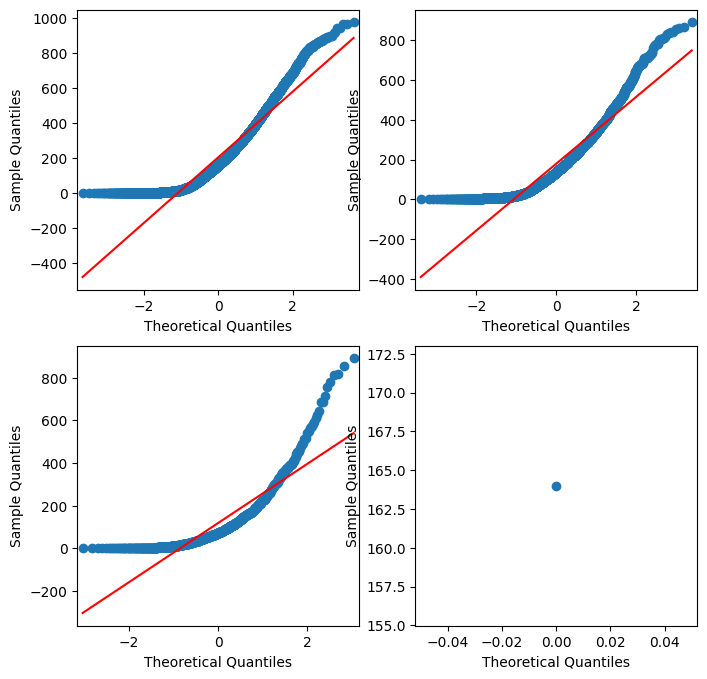

In [69]:
import statsmodels.api as sm
a = [count_g1,count_g2,count_g3,count_g4]

fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

sm.qqplot(a[0], line = "s", ax = axis[0,0])
sm.qqplot(a[1], line = "s", ax = axis[0,1])
sm.qqplot(a[2], line = "s", ax = axis[1,0])
sm.qqplot(a[3], line = "s", ax = axis[1,1])

plt.show()

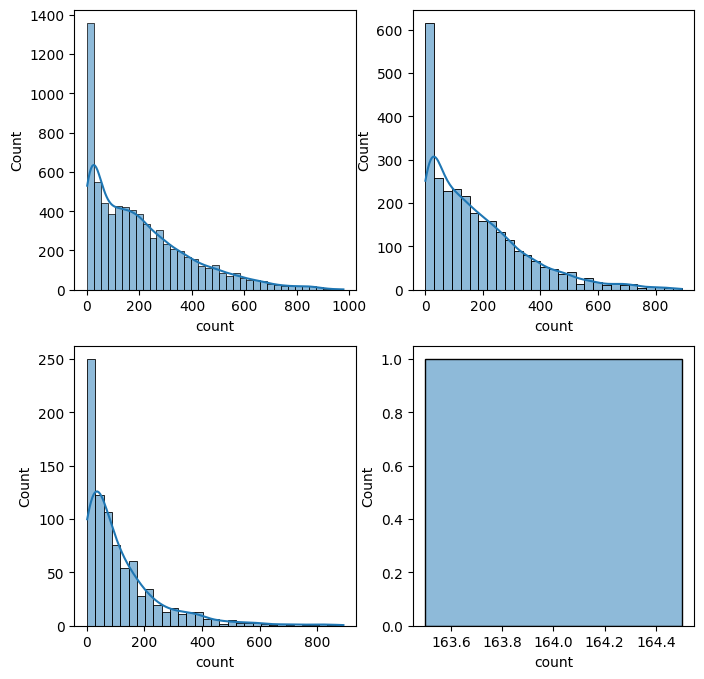

In [70]:
a = [count_g1,count_g2,count_g3,count_g4]

fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

index = 0
for row in range(2):
    for col in range(2):
        sns.histplot(a[index], ax=axis[row, col], kde=True)
        index += 1
plt.show()

#### QQ plot and histogram for season

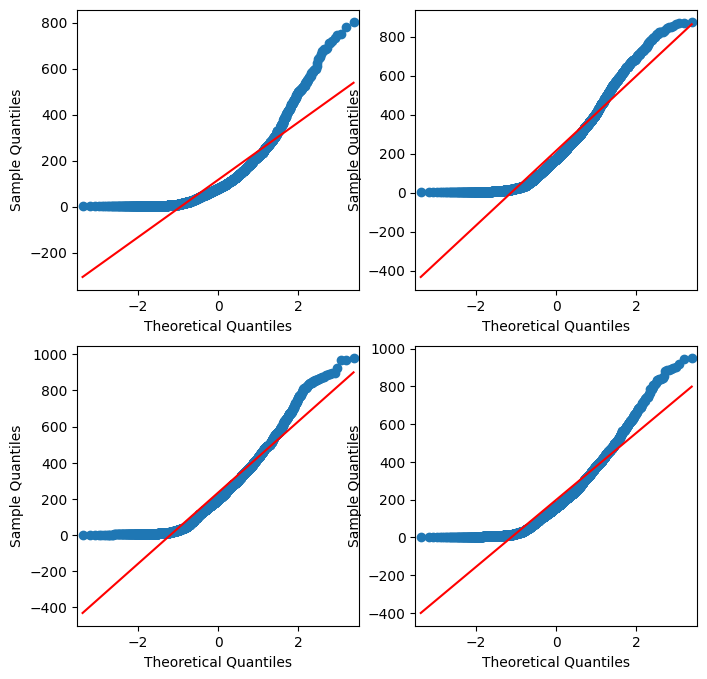

In [75]:
b = [coun_g1, coun_g2, coun_g3, coun_g4]

fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

sm.qqplot(b[0], line = "s", ax = axis[0,0])
sm.qqplot(b[1], line = "s", ax = axis[0,1])
sm.qqplot(b[2], line = "s", ax = axis[1,0])
sm.qqplot(b[3], line = "s", ax = axis[1,1])

plt.show()

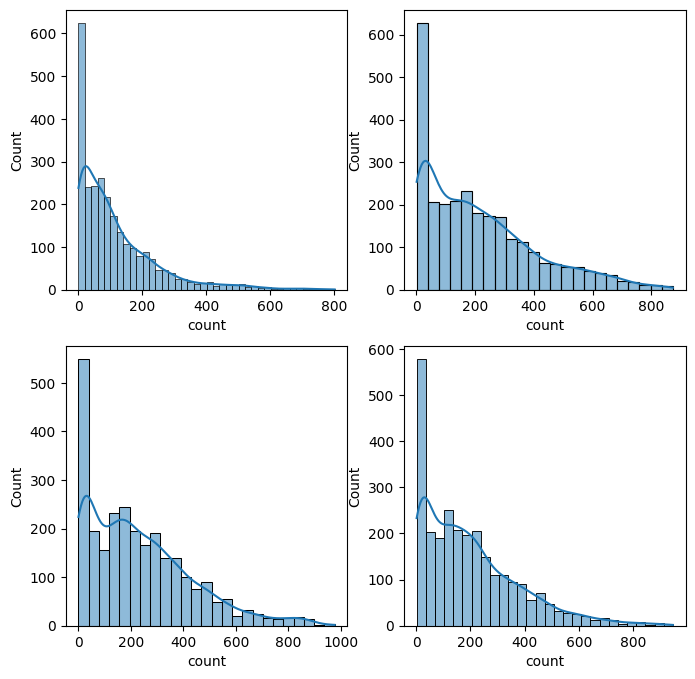

In [76]:
b = [coun_g1,coun_g2,coun_g3,coun_g4]

fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

index = 0
for row in range(2):
    for col in range(2):
        sns.histplot(b[index], ax=axis[row, col], kde=True)
        index += 1
plt.show()

### The above plots show data is not gaussian. Let us confirm the same via statiscal test.

#### Shapiro-Wilk test for Gaussian (Statistical Test for Normality) 

Weather Data

In [90]:
count_g1_subset = count_g1.sample(100)

# H0: Data is Gaussian
# Ha: Data is not Gaussian

test_stat, p_value = shapiro(count_g1_subset)
print(p_value)
if p_value<0.05:
    print("Data is not gaussian")
else:
    print("Data is gaussian")

6.270966679267076e-08
Data is not gaussian


Season Data

In [93]:
coun_g1_subset = coun_g1.sample(100)

# H0: Data is Gaussian
# Ha: Data is not Gaussian

test_stat, p_value = shapiro(coun_g1_subset)
print(p_value)
if p_value<0.05:
    print("Data is not gaussian")
else:
    print("Data is gaussian")

4.154456778593385e-09
Data is not gaussian


### Equal variance: Levene's Test 

Null Hypothesis: Variances is similar in different weather and season.

Alternate Hypothesis: Variances is not similar in different weather and season.

Significance level (alpha): 0.05

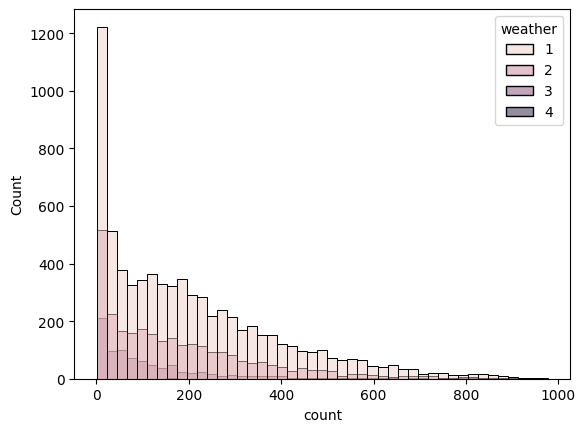

In [96]:
sns.histplot(data= df, x="count", hue= "weather", color = "o")
plt.show()

In [97]:
# H0: Variances are equal
# Ha: Variances are not equal
levene_stat, p_value = levene(count_g1,count_g2,count_g3,count_g4)
print(f'p-value : {p_value}')
if p_value < 0.05:
    print("Reject the null hypthesis.Variances are not similar.")
else:
    print("Variance are similar.")

p-value : 3.504937946833238e-35
Reject the null hypthesis.Variances are not similar.


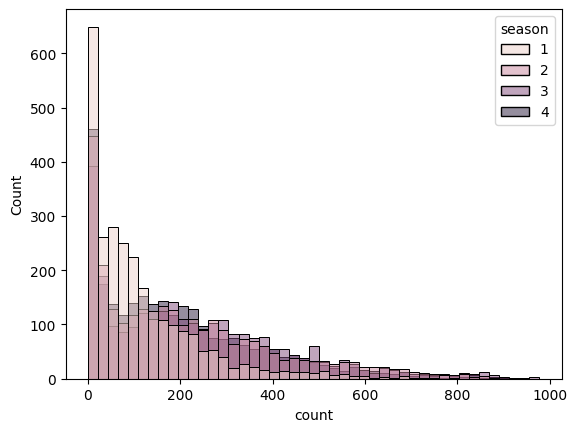

In [98]:
sns.histplot(data= df, x="count", hue= "season", color = "o")
plt.show()

In [99]:
# H0: Variances are equal
# Ha: Variances are not equal
levene_stat, p_value = levene(coun_g1,coun_g2,coun_g3,coun_g4)
print(f'p-value : {p_value}')
if p_value < 0.05:
    print("Reject the null hypthesis. Variances are not similar.")
else:
    print("Variance are similar.")

p-value : 1.0147116860043298e-118
Reject the null hypthesis. Variances are not similar.


# As per the QQ plots, histograms, Shapiro and Levene test the assumtions of Anova have failed. Hence we will use Kruskal test.

### Weather 

In [101]:
kruskal_stat, p_value = kruskal(count_g1,count_g2,count_g3,count_g4)
print(f"p_value : {p_value}")

if p_value<0.05:
  print("Since p-value is less than 0.05, we reject the null hypothesis")
  print('Different weather have different number of cycles rented.')
else :
  print("Failes to reject null hypothesis. All weathers has same number of cycles rented.")

p_value : 3.501611300708679e-44
Since p-value is less than 0.05, we reject the null hypothesis
Different weather have different number of cycles rented.


### Season 

In [103]:
kruskal_stat, p_value = kruskal(coun_g1,coun_g2,coun_g3,coun_g4)
print(f"p_value : {p_value}")

if p_value<0.05:
  print("Since p-value is less than 0.05, we reject the null hypothesis")
  print('Different weather have different number of cycles rented.')
else :
  print("Failed to reject null hypothesis. All weathers has same number of cycles rented.")

p_value : 2.479008372608633e-151
Since p-value is less than 0.05, we reject the null hypothesis
Different weather have different number of cycles rented.


## Insights 

* In summer and fall seasons more bikes are rented as compared to other seasons.
* It is seen there is increase in bike rentals on holidays.
* It is also clear from the workingday also that whenever day is holiday or weekend,slightly more bikes were rented.
* Whenever there is rain, thunderstorm, snow or fog, there were less bikes were rented.
* Whenever the humidity is less than 20, number of bikes rented is very very low.
* Whenever the temperature is less than 10, number of bikes rented is less.
* Whenever the windspeed is greater than 35, number of bikes rented is less.
* A 2-sample T-test on working and non-working days with respect to count,implies that the mean population count of both    categories are the same.
* An ANOVA test on different seasons with respect to count,implies that population count means under different seasons are not the same, meaning there is a difference in the usage of Yulu bikes in different seasons.
* By performing an ANOVA test on different weather conditions except 4 with respect to count, we can infer that population count means under different weather conditions are the same, meaning there is a difference in the usage of Yulu bikes in different weather conditions.
* By performing a Chi2 test on season and weather (categorical variables), we can infer that there is an impact on weather dependent on season.
* The maximum number of holidays can be seen during the fall and winter seasons.
* There is a positive corelation between counts and temperature.
* There is a negative corelation between counts and humidity.

## Recommendations 

* In summer and fall seasons the company should have more bikes in stock to be rented. Because the demand in these seasons is higher as compared to other seasons.
* With a significance level of 0.05, workingday has no effect on the number of bikes being rented.
* In very low humid days, company should have less bikes in the stock to be rented.
* Whenever temperature is less than 10 or in very cold days, company should have less bikes.
* Whenever the windspeed is greater than 35 or in thunderstorms, company should have less bikes in stock to be rented.
* Consistent monitoring of seasonal weather forecast would help Yulu to be prepared for nature related decline in rented bikes due to rains, humidity,etc.
* As casual users are very less Yulu should focus on marketing startegy to bring more customers. for eg. first time user discount, friends and family discounts, referral bonuses etc.
* On non working days as count is low. We would recommend certain promotional campaigns to attracts uses on these days.
* In heavy rains as rent count is very low Yulu can introduce a different vehicle such as car or umbrella attached bike to encourage more users.